# Project: Investigate a Dataset (TMDB movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

1-In order to complete my Investigate a dataset project i am using a dataset called TMDB movies file downloaded from the udacity.

2-the shape of the dataset is 10866 rows with 21 columns.

Questions that can be used to analyse the dataset are:
--

1-Movies with profit and loss.

2-Movies with lower and higher budget.

3-Movies with lower and higher revenue.

4-Most of the genres.

5-Most of the cast.

6-Movie with shortest and longest runtime.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

--Data Wrangling is used to clean the dataset for better results.As per my observation from the dataset there are some of the cleanliness need to be done.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df_clean=df.copy()
df_clean.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [7]:
df_clean.shape

(10866, 21)

In [8]:
df_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning (Replace this with more specific notes!)
As per my observation made from the dataset, There are some cleaning,calculation and change of datatype of some columns are need to be done.

1-There are 4 columns that are duplicated values in the original_title column from the dataset.

2-There are some unwanted columns that need to be droped.

3-caluclation for profit and profit_adj(from columns budget,revenue,budget_adj,revenue_adj)

4-changinf the datatypes of some columns.

Note:-for the currency related columns i am going to assume that the currency will be in Dollors, as dollors is used as  the international currency.

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

**Finding sum of null values in the Dataset:**

In [11]:
df_clean.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Finding the number of Duplicated values in the original_titles column:**

In [15]:
df_clean.original_title.duplicated(False).value_counts()

False    10294
True       572
Name: original_title, dtype: int64

In [20]:
df_clean[df_clean.original_title.duplicated(False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,...,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.8,2015,8.739996e+07,4.989630e+08
46,228161,tt2224026,2.976436,135000000,368871007,Home,Jim Parsons|Rihanna|Steve Martin|Jennifer Lope...,http://www.meettheboov.com/,Tim Johnson,Worlds Collide,...,When Earth is taken over by the overly-confide...,94,Fantasy|Comedy|Animation|Science Fiction|Family,Twentieth Century Fox Film Corporation|DreamWo...,3/18/15,1060,6.9,2015,1.241999e+08,3.393612e+08
52,253412,tt2719848,2.798017,55000000,203427584,Everest,Jason Clarke|Jake Gyllenhaal|Josh Brolin|John ...,http://www.everestmovie.com/,Baltasar KormÃ¡kur,The Storm Awaits.,...,Inspired by the incredible events surrounding ...,121,Adventure|Drama,Universal Pictures|Working Title Films|Walden ...,9/10/15,1172,6.7,2015,5.059998e+07,1.871533e+08
54,257088,tt2058673,2.614499,105000000,133718711,Point Break,Edgar RamÃ­rez|Luke Bracey|Teresa Palmer|Delro...,https://www.facebook.com/PointBreakMovie,Ericson Core,The only law that matters is gravity,...,A young undercover FBI agent infiltrates a gan...,114,Action|Crime|Thriller,Studio Babelsberg|Alcon Entertainment|DMG Ente...,12/3/15,505,5.5,2015,9.659996e+07,1.230212e+08
61,166424,tt1502712,2.487042,120000001,167977596,Fantastic Four,Miles Teller|Kate Mara|Michael B. Jordan|Jamie...,http://www.fantasticfourmovie.com/,Josh Trank,Change is coming.,...,Four young outsiders teleport to a dangerous u...,100,Action|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Marv Fi...,8/5/15,1565,4.4,2015,1.104000e+08,1.545393e+08
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
71,276907,tt3569230,2.281350,25000000,42972994,Legend,Tom Hardy|Emily Browning|Christopher Eccleston...,https://www.uphe.com/movies/legend-2015,Brian Helgeland,"Love, fight, live, rule like a legend.",...,"Suave, charming and volatile, Reggie Kray and ...",131,Crime|Thriller,Working Title Films|Cross Creek Pictures|Anton...,9/9/15,619,6.7,2015,2.299999e+07,3.953514e+07
77,321741,tt3322364,2.121884,35000000,48623572,Concussion,Will Smith|Bitsie Tulloch|Gugu Mbatha-Raw|Alec...,http://www.sonypictures.com/movies/concussion/,Peter Landesman,Even Legends Need a Hero,...,A dramatic thriller based on the incredible tr...,123,Drama,Village Roadshow Pictures|Scott Free Productio...,11/12/15,500,6.9,2015,3.219999e+07,4.473367e+07
86,243688,tt1029360,1.984529,35000000,95437994,Poltergeist,Sam Rockwell|Rosemarie DeWitt|Saxon Sharbino|K...,NaN,Gil Kenan,They're Here. And They Know What Scares You.,...,Legendary filmmaker Sam Raimi and director Gil...,93,Horror|Thriller,Ghost House Pictures|Vertigo Entertainment|Met...,5/20/15,589,5.0,2015,3.219999e+07,8.780292e+07


**Comparing two columns to find the duplicate values columns are original_title and cast:**

In [21]:
df_clean.duplicated(['original_title','cast'],False).value_counts()

False    10862
True         4
dtype: int64

In [23]:
df_clean[df_clean.duplicated(['original_title','cast'],False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,9.670000e+05
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,9.670000e+05
4063,28004,tt0359639,0.371510,6000000,0,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,"Just as the southern matriarch, Madea buries h...",0,Comedy,NaN,1/25/02,49,5.9,2002,7.273568e+06,0.000000e+00
6701,16781,tt0455612,0.552267,6000000,57231524,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,Based upon Tyler Perry's acclaimed stage produ...,110,Drama|Comedy|Romance,Lions Gate Films,2/24/06,63,6.0,2006,6.490015e+06,6.190557e+07


**Droping the duplicate values except the first occurrence and checking the duplicate values:**

In [31]:
df_clean.drop_duplicates(['original_title','cast'],keep='first',inplace=True)

In [32]:
df_clean[df_clean.duplicated(['original_title','cast'])]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


**Dropping unwanted columns such as id,imdb_id,keywords,overview,production_companies:**

In [33]:
df_clean.drop(['id','imdb_id','homepage','keywords','overview','production_companies','homepage','tagline','keywords','production_companies'],axis=1,inplace=True)

In [34]:
df_clean.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


**Change of datat types to some of the columns:**

1-budget_adj column from float64 to int64.

2-revenue_adj column from float6 to int 64.

3-release_date from str to datetime.

In [35]:
df_clean['budget_adj']=df_clean['budget_adj'].astype('int64')

In [36]:
df_clean['revenue_adj']=df_clean['revenue_adj'].astype('int64')

In [37]:
df_clean['release_date']=pd.to_datetime(df_clean['release_date'],format='%m/%d/%y')

In [38]:
df_clean.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj                 int64
revenue_adj                int64
dtype: object

**Caluclation for profit and profit_adj:**

In [39]:
df_clean['profit']=df_clean['revenue']-df_clean['budget']

In [40]:
df_clean['profit_adj']=(df_clean['revenue_adj']-df_clean['budget_adj']).astype('int64')

In [41]:
df_clean.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,1254445953
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292,228436354,210161353
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025,185238201,170419070
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723129,1868178225,1718723210
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801,1316249360,1210948878
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,124199945,490314247,397950503,366114302
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,142599937,405355075,285603537,262755138
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,99359956,547749654,487380321,448389698
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,68079970,1064192016,1082730962,996112046
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,160999929,785411574,678708609,624411645


In [42]:
df_clean.budget.replace((0),np.NaN,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


# Question 1-Movies with profit and loss.

In [63]:
movie_profit=pd.DataFrame(df_clean.loc[df_clean.profit.idxmax()])
movie_loss=pd.DataFrame(df_clean.loc[df_clean.profit.idxmin()])
pd.concat([movie_profit,movie_loss],axis=1)

,1386,2244
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
vote_count,8458,74


# Question 2-Movies with lower and higher budget.

In [67]:
movie_budget_high=pd.DataFrame(df_clean.loc[df_clean.budget.idxmax()])
movie_budget_low=pd.DataFrame(df_clean.loc[df_clean.budget.idxmin()])
pd.concat([movie_budget_high,movie_budget_low],axis=1)

,2244,1151
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror
release_date,2010-12-02 00:00:00,2014-10-31 00:00:00
vote_count,74,15


# Question 3-Movies with lower and higher revenue.

In [72]:
movie_revenue_high=pd.DataFrame(df_clean.loc[df_clean.revenue.idxmax()])
movie_revenue_low=pd.DataFrame(df_clean.loc[df_clean.revenue.idxmin()])
pd.concat([movie_revenue_high,movie_revenue_low],axis=1)

,1386,48
popularity,9.43277,2.93234
budget,2.37e+08,3e+07
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00
vote_count,8458,481


# Question 4-Movie with shortest and longest runtime.

In [74]:
movie_runtime_high=pd.DataFrame(df_clean.loc[df_clean.runtime.idxmax()])
movie_runtime_low=pd.DataFrame(df_clean.loc[df_clean.runtime.idxmin()])
pd.concat([movie_runtime_high,movie_runtime_low],axis=1)

,3894,92
popularity,0.006925,1.87604
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Mythica: The Necromancer
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...
director,Mark Cousins,A. Todd Smith
runtime,900,0
genres,Documentary,Fantasy|Action|Adventure
release_date,2011-09-03 00:00:00,2015-12-19 00:00:00
vote_count,14,11


# Count of genres in the dataset:

In [125]:
def genres(column):
    genres=df_clean[column].str.cat(sep='|')
    genres=pd.Series(genres.split("|"))
    count=genres.value_counts()
    return count
genres_count=genres('genres')
genres_count

Drama              4759
Comedy             3792
Thriller           2907
Action             2384
Romance            1711
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

# Count of casts in the dataset:

In [174]:
def cast(column):
    cast=df_clean[column].str.cat(sep='|')
    cast=pd.Series(cast.split("|"))
    count=cast.value_counts()
    return count
cast_count=cast('cast')
cast_count

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Susan Sarandon        48
Liam Neeson           48
Alec Baldwin          47
Julianne Moore        47
Tom Hanks             46
Christopher Walken    46
Gene Hackman          46
Johnny Depp           46
Willem Dafoe          45
Sylvester Stallone    45
Dennis Quaid          45
Clint Eastwood        44
Meryl Streep          44
Ed Harris             44
Donald Sutherland     44
Robert Downey Jr.     43
Woody Harrelson       43
Keanu Reeves          43
Antonio Banderas      43
Ewan McGregor         43
Eddie Murphy          42
                      ..
Matt Corboy            1
Monica Swinn           1
Bernie McInerney       1
Gisele Fraga           1
GÃ©rard Darmon         1
George Williams        1
Barry Nelson           1
Yuta Hiraoka           1
ShÅ Hayami             1


# Profit earned by movies across the year:

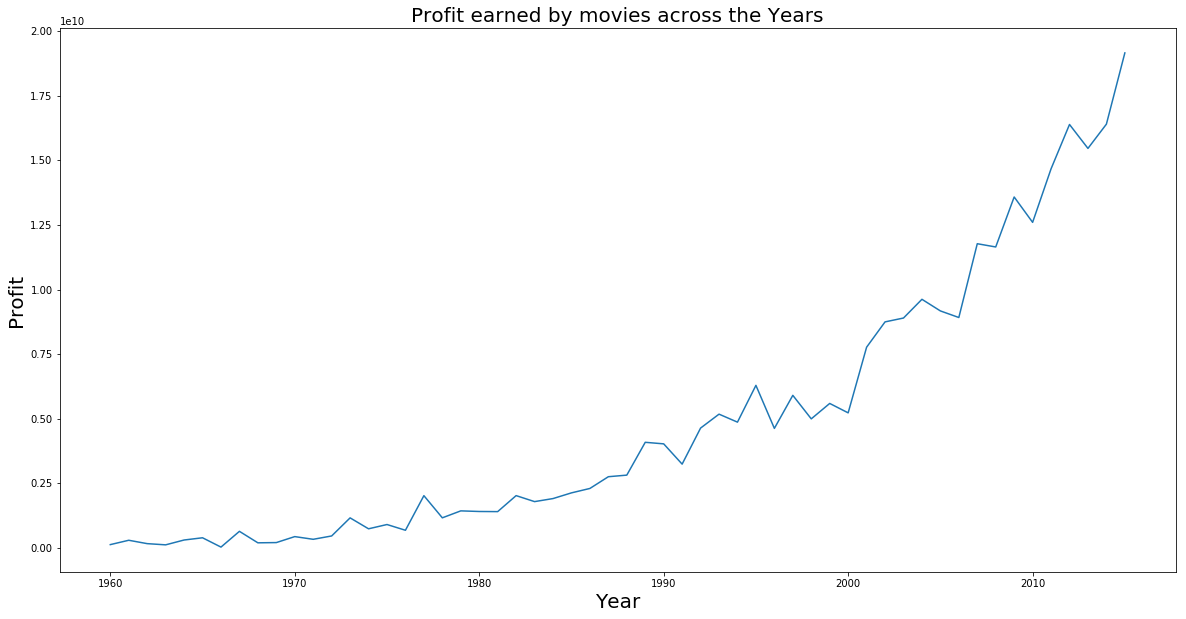

In [180]:
profit_year=df_clean.groupby('release_year')['profit'].sum()
plt.figure(figsize=(20,10));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.title('Profit earned by movies across the Years',fontsize=20)
plt.plot(profit_year);

# Movie budget Over the years:

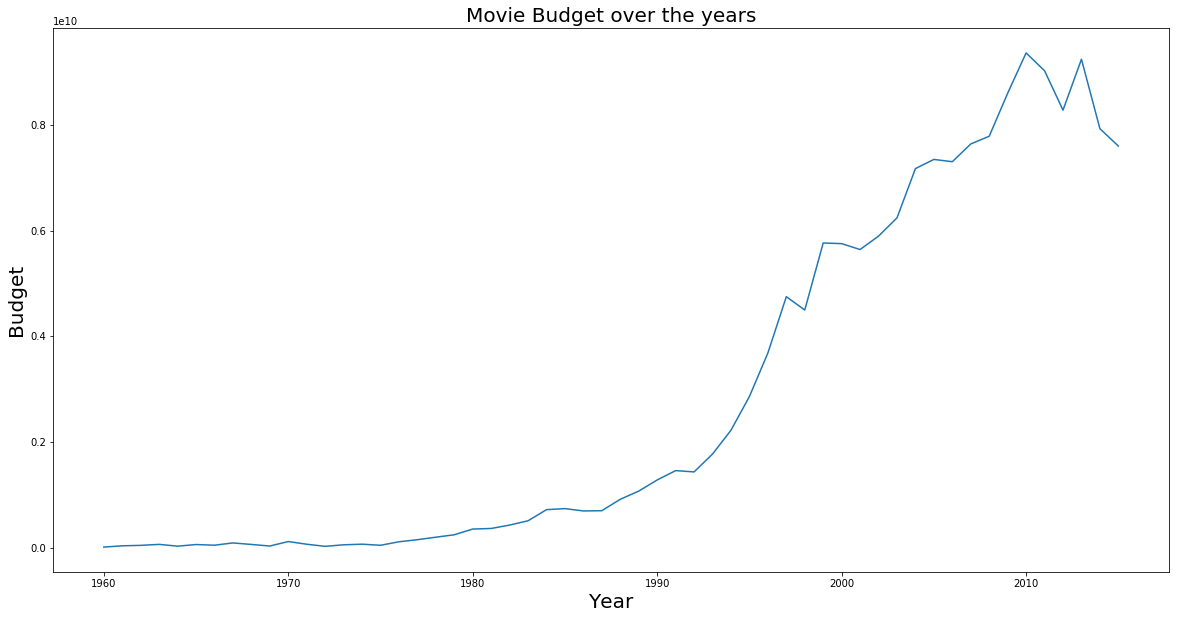

In [181]:
budget_year=df_clean.groupby('release_year')['budget'].sum()
plt.figure(figsize=(20,10));
plt.xlabel('Year',fontsize=20);
plt.ylabel('Budget',fontsize=20);
plt.title('Movie Budget over the years',fontsize=20);
plt.plot(budget_year);

# Popularity of the movies over the years:

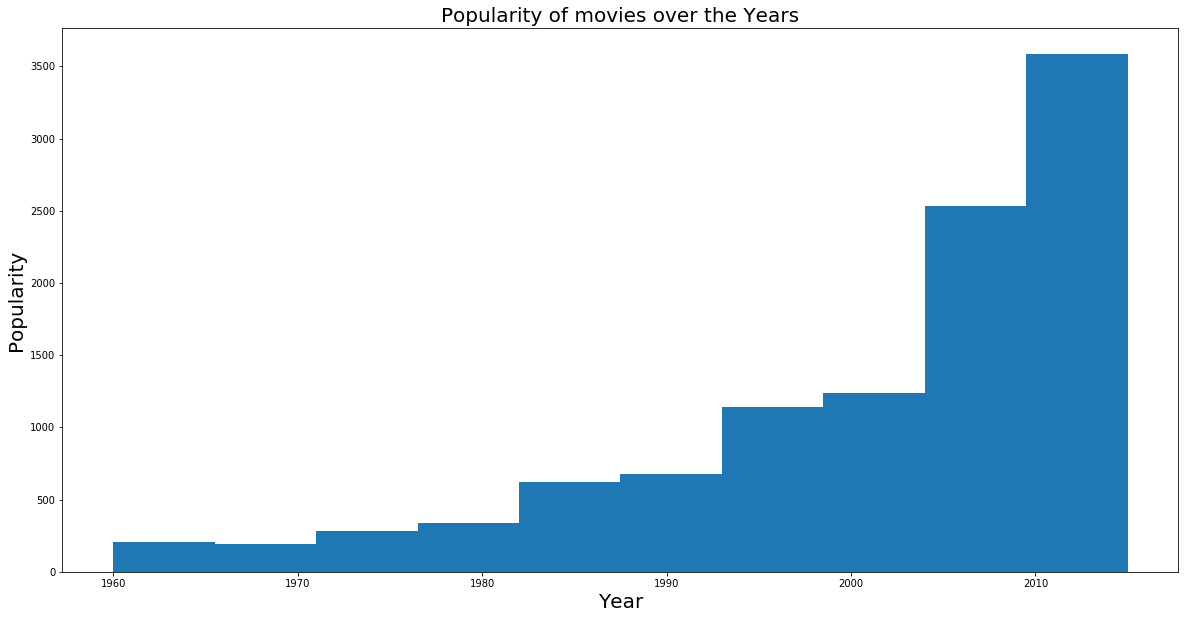

In [179]:
popularity=df_clean.groupby('popularity')['release_year'].mean()
plt.figure(figsize=(20,10));
plt.xlabel('Year',fontsize=20);
plt.ylabel('Popularity',fontsize=20);
plt.title('Popularity of movies over the Years',fontsize=20)
plt.hist(popularity);

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])